**#Steps in EDA**

1. Importing necessary libraries
2. Reading the dataset
3. Data Analysis(Data Understanding such as null values, checking duplicates)
4. Data Reduction
5. Feature Engineering
6. Creating Features
7. Data Wrangling/ Data Cleaning
8. **Exploratory Data Analysis (EDA)**
    - Univariate
    - Bivariate
    - Multivariate

In [1]:
# STEP 1:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# STEP 2:
data = pd.read_csv("used_cars_data.csv")
data

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN


In [3]:
# STEP 3:
data.info

<bound method DataFrame.info of       S.No.                                               Name    Location  \
0         0                             Maruti Wagon R LXI CNG      Mumbai   
1         1                   Hyundai Creta 1.6 CRDi SX Option        Pune   
2         2                                       Honda Jazz V     Chennai   
3         3                                  Maruti Ertiga VDI     Chennai   
4         4                    Audi A4 New 2.0 TDI Multitronic  Coimbatore   
...     ...                                                ...         ...   
7248   7248                  Volkswagen Vento Diesel Trendline   Hyderabad   
7249   7249                             Volkswagen Polo GT TSI      Mumbai   
7250   7250                             Nissan Micra Diesel XV     Kolkata   
7251   7251                             Volkswagen Polo GT TSI        Pune   
7252   7252  Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...       Kochi   

      Year  Kilometers_Driven F

In [4]:
data.nunique()

S.No.                7253
Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               450
Engine                150
Power                 386
Seats                   9
New_Price             625
Price                1373
dtype: int64

In [5]:
# as there are no duplicate rows here son the next step is to check nulls
(data.isnull().sum()/len(data))*100

S.No.                 0.000000
Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.027575
Engine                0.634220
Power                 0.634220
Seats                 0.730732
New_Price            86.129877
Price                17.013650
dtype: float64

# Data Reduction
step 4:

In [6]:
# droping the unnecessary columns from the model
data.drop(columns=['S.No.', 'New_Price'], inplace = True)

# dropping the rows from the columns that are part if the model
data.dropna(subset=['Mileage', 'Engine', 'Power', 'Seats', 'Price'], inplace=True)


In [7]:
data.reset_index(drop=True, inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5975 entries, 0 to 5974
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5975 non-null   object 
 1   Location           5975 non-null   object 
 2   Year               5975 non-null   int64  
 3   Kilometers_Driven  5975 non-null   int64  
 4   Fuel_Type          5975 non-null   object 
 5   Transmission       5975 non-null   object 
 6   Owner_Type         5975 non-null   object 
 7   Mileage            5975 non-null   object 
 8   Engine             5975 non-null   object 
 9   Power              5975 non-null   object 
 10  Seats              5975 non-null   float64
 11  Price              5975 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 560.3+ KB


# Feature Engineering

In [8]:
data["Brand"] = data.Name.str.split().str.get(0)
data["Model"] = data.Name.str.split().str.get(1)+" "+data.Name.str.split().str.get(2)

In [9]:
data[['Name', 'Brand', 'Model']]

,Name,Brand,Model
0,Maruti Wagon R LXI CNG,Maruti,Wagon R
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Creta 1.6
2,Honda Jazz V,Honda,Jazz V
3,Maruti Ertiga VDI,Maruti,Ertiga VDI
4,Audi A4 New 2.0 TDI Multitronic,Audi,A4 New
...,...,...,...
5970,Maruti Swift VDI,Maruti,Swift VDI
5971,Hyundai Xcent 1.1 CRDi S,Hyundai,Xcent 1.1
5972,Mahindra Xylo D4 BSIV,Mahindra,Xylo D4
5973,Maruti Wagon R VXI,Maruti,Wagon R


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5975 entries, 0 to 5974
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5975 non-null   object 
 1   Location           5975 non-null   object 
 2   Year               5975 non-null   int64  
 3   Kilometers_Driven  5975 non-null   int64  
 4   Fuel_Type          5975 non-null   object 
 5   Transmission       5975 non-null   object 
 6   Owner_Type         5975 non-null   object 
 7   Mileage            5975 non-null   object 
 8   Engine             5975 non-null   object 
 9   Power              5975 non-null   object 
 10  Seats              5975 non-null   float64
 11  Price              5975 non-null   float64
 12  Brand              5975 non-null   object 
 13  Model              5975 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 653.6+ KB


In [11]:
# inorder to get age of car we need to import date and calculate
from datetime import date

# date.today().year
data["Car_Age"] = date.today().year- data["Year"]
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,Maruti,Wagon R,15
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,Hyundai,Creta 1.6,10
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,Honda,Jazz V,14
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,Maruti,Ertiga VDI,13
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,Audi,A4 New,12


For changing datatype of Power from str to numeric<br>
In order to do so we need to use 'coerce' which is very imp as it assumes the cell which has str as zero, but actually it's not a zero. So while doing sum it just ignores that cell and while count it is counted


In [12]:
data["Power"] = data.Power.str.split().str.get(0)
data["Power"] = pd.to_numeric(data["Power"], errors = "coerce")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5975 entries, 0 to 5974
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5975 non-null   object 
 1   Location           5975 non-null   object 
 2   Year               5975 non-null   int64  
 3   Kilometers_Driven  5975 non-null   int64  
 4   Fuel_Type          5975 non-null   object 
 5   Transmission       5975 non-null   object 
 6   Owner_Type         5975 non-null   object 
 7   Mileage            5975 non-null   object 
 8   Engine             5975 non-null   object 
 9   Power              5872 non-null   float64
 10  Seats              5975 non-null   float64
 11  Price              5975 non-null   float64
 12  Brand              5975 non-null   object 
 13  Model              5975 non-null   object 
 14  Car_Age            5975 non-null   int64  
dtypes: float64(3), int64(3), object(9)
memory usage: 700.3+ KB


In [13]:
# For changing datatype of Engine from str to numeric

In [14]:
data["Engine"] = data.Engine.str.split().str.get(0)
data["Engine"] = pd.to_numeric(data["Engine"], errors = "coerce")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5975 entries, 0 to 5974
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5975 non-null   object 
 1   Location           5975 non-null   object 
 2   Year               5975 non-null   int64  
 3   Kilometers_Driven  5975 non-null   int64  
 4   Fuel_Type          5975 non-null   object 
 5   Transmission       5975 non-null   object 
 6   Owner_Type         5975 non-null   object 
 7   Mileage            5975 non-null   object 
 8   Engine             5975 non-null   int64  
 9   Power              5872 non-null   float64
 10  Seats              5975 non-null   float64
 11  Price              5975 non-null   float64
 12  Brand              5975 non-null   object 
 13  Model              5975 non-null   object 
 14  Car_Age            5975 non-null   int64  
dtypes: float64(3), int64(4), object(8)
memory usage: 700.3+ KB


In [15]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998,58.16,5.0,1.75,Maruti,Wagon R,15
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582,126.20,5.0,12.50,Hyundai,Creta 1.6,10
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199,88.70,5.0,4.50,Honda,Jazz V,14
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248,88.76,7.0,6.00,Maruti,Ertiga VDI,13
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968,140.80,5.0,17.74,Audi,A4 New,12


In [16]:
data["Seats"] = data["Seats"].astype(str)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5975 entries, 0 to 5974
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5975 non-null   object 
 1   Location           5975 non-null   object 
 2   Year               5975 non-null   int64  
 3   Kilometers_Driven  5975 non-null   int64  
 4   Fuel_Type          5975 non-null   object 
 5   Transmission       5975 non-null   object 
 6   Owner_Type         5975 non-null   object 
 7   Mileage            5975 non-null   object 
 8   Engine             5975 non-null   int64  
 9   Power              5872 non-null   float64
 10  Seats              5975 non-null   object 
 11  Price              5975 non-null   float64
 12  Brand              5975 non-null   object 
 13  Model              5975 non-null   object 
 14  Car_Age            5975 non-null   int64  
dtypes: float64(2), int64(4), object(9)
memory usage: 700.3+ KB


In [17]:
#  function to convert km/kg into kmpl

def convert_to_kmpl(mileage):
    if 'km/kg' in mileage:
        value = float(mileage.replace(" km/kg", ""))
        return value * 1.4 # replace with kmpl value
    elif "kmpl" in mileage:
        value = float(mileage.replace(" kmpl", ""))
        return value # keep kmpl value as is
    else:
        return np.nan # handle any unexpected values

In [18]:
convert_to_kmpl("26.6 km/kg")

37.24

In [19]:
# lambda helps u to apply functions on list, tuple, etc

data['Mileage'] = data['Mileage'].apply(lambda x : convert_to_kmpl(str(x)))
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,37.24,998,58.16,5.0,1.75,Maruti,Wagon R,15
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5.0,12.50,Hyundai,Creta 1.6,10
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5.0,4.50,Honda,Jazz V,14
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00,Maruti,Ertiga VDI,13
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5.0,17.74,Audi,A4 New,12


# Data Wrangling/ Data Cleaning

In [20]:
print(data.Brand.unique()) #you need to check for other columns also but here there are no duplicates so no problem

['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra' 'Ford'
 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda' 'Mini' 'Fiat'
 'Jeep' 'Smart' 'Ambassador' 'Isuzu' 'ISUZU' 'Force' 'Bentley'
 'Lamborghini']


In [21]:
data["Brand"]

0          Maruti
1         Hyundai
2           Honda
3          Maruti
4            Audi
          ...    
5970       Maruti
5971      Hyundai
5972     Mahindra
5973       Maruti
5974    Chevrolet
Name: Brand, Length: 5975, dtype: object

In [22]:
data["Brand"].replace({"ISUZU":"Isuzu", "Land":"Land Rover", "Mini":"Mini Cooper"}, inplace = True)

# Exploratory Data Analysis (EDA)
**1.Univariate**


In [23]:
data.describe()
# data.describe().T # inorder to interchange/transport rows and columns 

,Year,Kilometers_Driven,Mileage,Engine,Power,Price,Car_Age
count,5975.000000,5.975000e+03,5975.000000,5975.000000,5872.000000,5975.000000,5975.000000
mean,2013.386778,5.867431e+04,18.287676,1621.606695,113.276894,9.501647,11.613222
std,3.247238,9.155851e+04,4.823919,601.036987,53.881892,11.205736,3.247238
min,1998.000000,1.710000e+02,0.000000,624.000000,34.200000,0.440000,6.000000
25%,2012.000000,3.390800e+04,15.260000,1198.000000,75.000000,3.500000,9.000000
50%,2014.000000,5.300000e+04,18.200000,1493.000000,97.700000,5.650000,11.000000
75%,2016.000000,7.300000e+04,21.100000,1984.000000,138.100000,9.950000,13.000000
max,2019.000000,6.500000e+06,46.956000,5998.000000,560.000000,160.000000,27.000000


**Analysis :**
- Years ranges from 1998 to 2008. This implies a high range of 21 years with most of the cars falling between 2012 to 2019(75%). This implies that data contains both old and latest model (mostly cars with less than 5 years of age).
- Avg KM drives is ~59 KM. The range is huge (around 64 lakhs) implying presence of outliers in the columns. It means we need to remove the outliers from this column.
- The minimum value in mileage column is 0, which can not be sold. This appears like a data entry issue.
- Both Engine and Power have outliers and data seems to be rightly skeewed.
- The max price for the used car is 160K, which is quite high for the used car. This may be an outlier or a data entry issue.
- Avg age of car is ~12 years

In [24]:
cat_col = data.select_dtypes(include=["object"]).columns
num_col = data.select_dtypes(include = np.number).columns
print("Categorical columns are: ")
print(cat_col)
print("Number columns are: ")
print(num_col)

Categorical columns are: 
Index(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Seats',
       'Brand', 'Model'],
      dtype='object')
Number columns are: 
Index(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Price',
       'Car_Age'],
      dtype='object')


**2. Univariate Analysis**

Year
Skewness:  -0.84


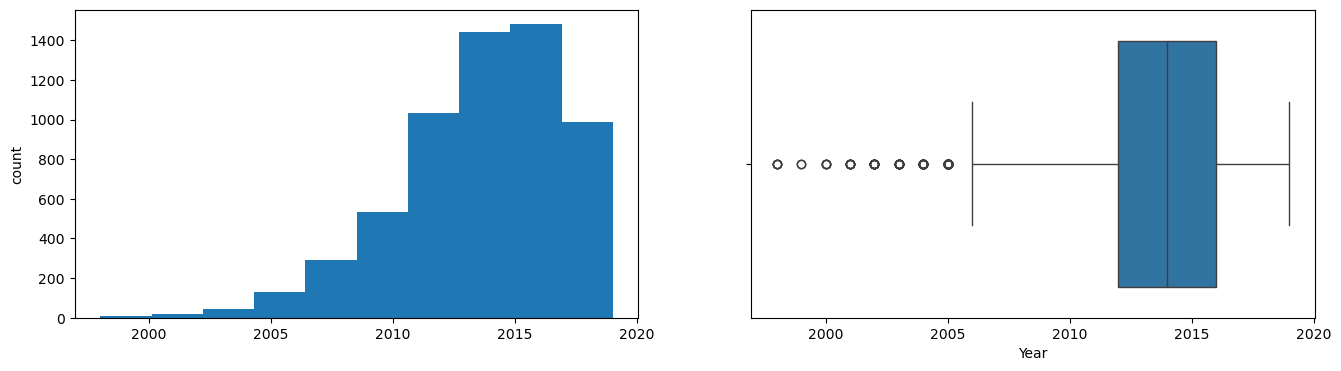

Kilometers_Driven
Skewness:  58.6


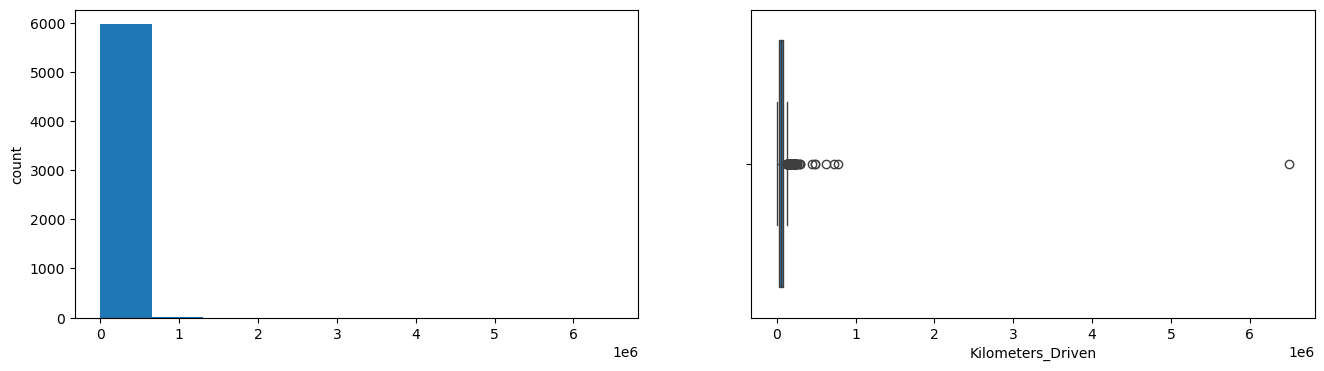

Mileage
Skewness:  0.3


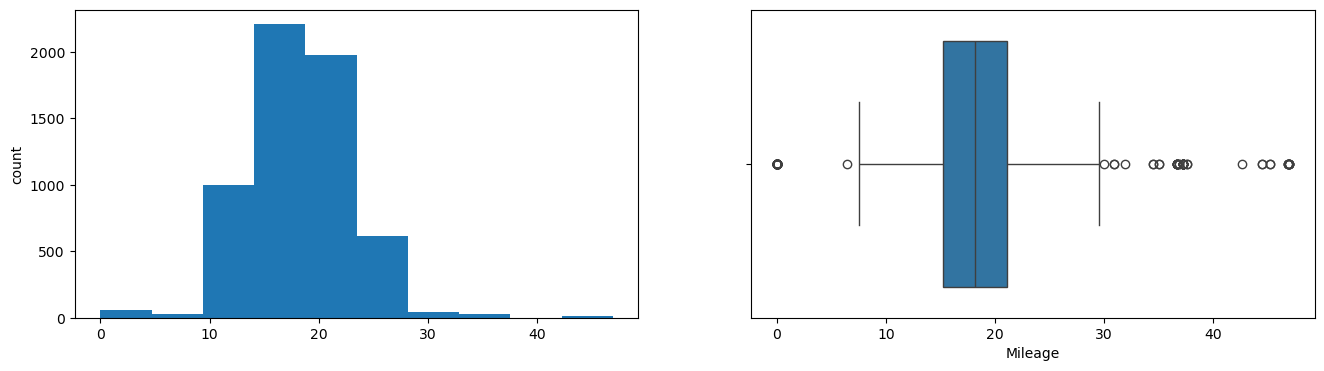

Engine
Skewness:  1.43


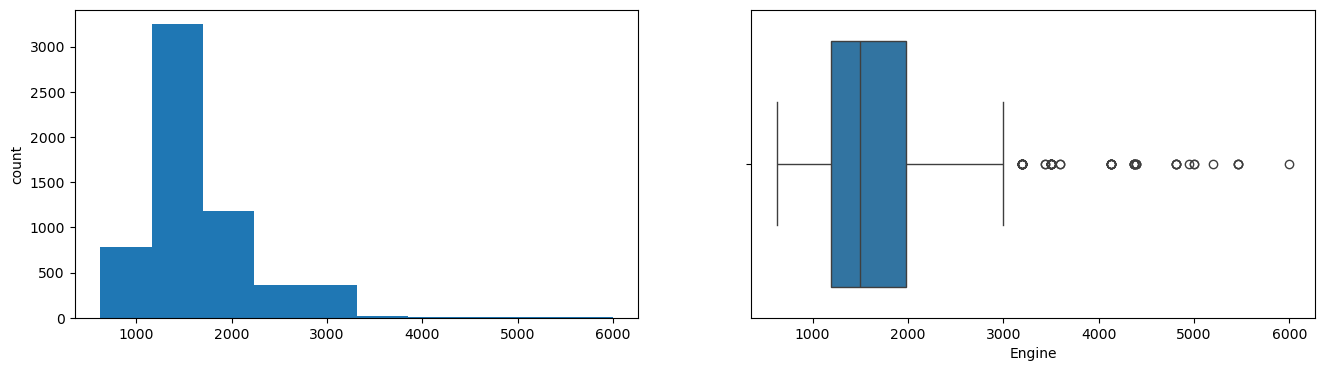

Power
Skewness:  1.92


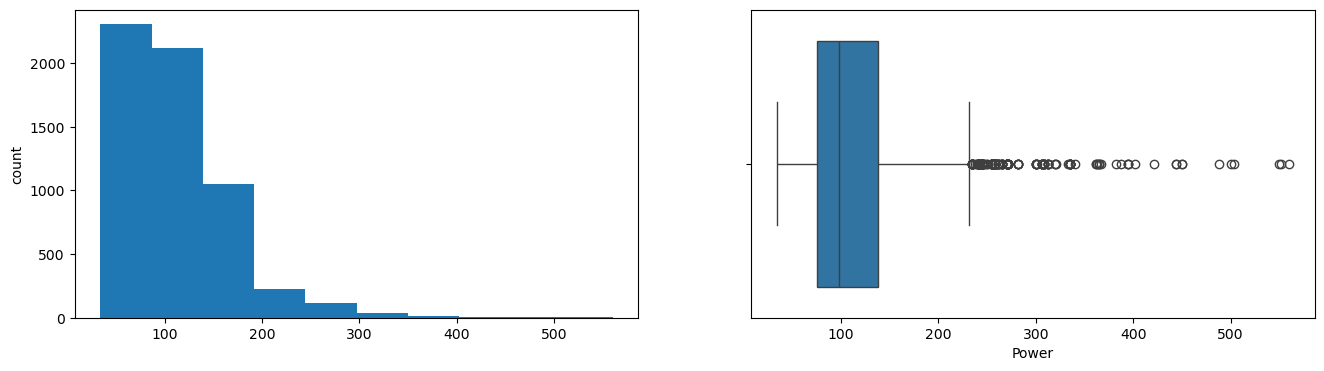

Price
Skewness:  3.33


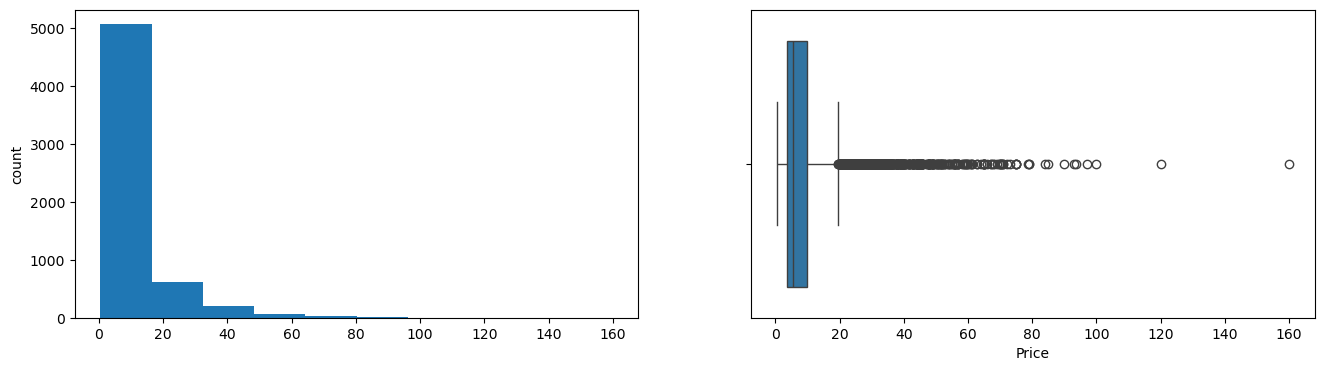

Car_Age
Skewness:  0.84


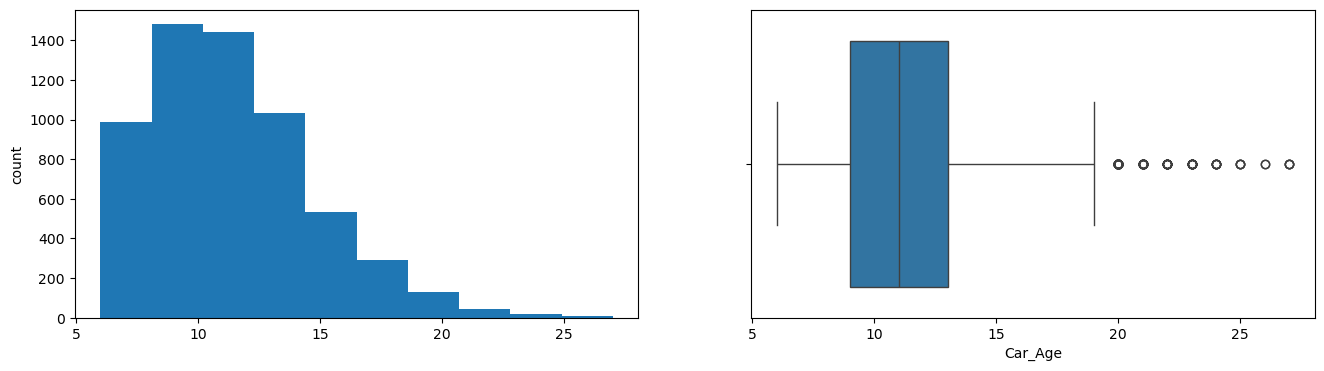

In [25]:
for col in num_col:
    print(col)
    print("Skewness: ", round(data[col].skew(),2))
    plt.figure(figsize=(16,4))
    plt.subplot(1,2,1)
    data[col].hist(grid = False)
    plt.ylabel("count")
    plt.subplot(1,2,2)
    sns.boxplot(x = data[col])
    plt.show()

In [26]:
# Outlier Removal

for col in num_col:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    data = data[(data[col]>=lower_bound) & (data[col]<=upper_bound)]
    
    

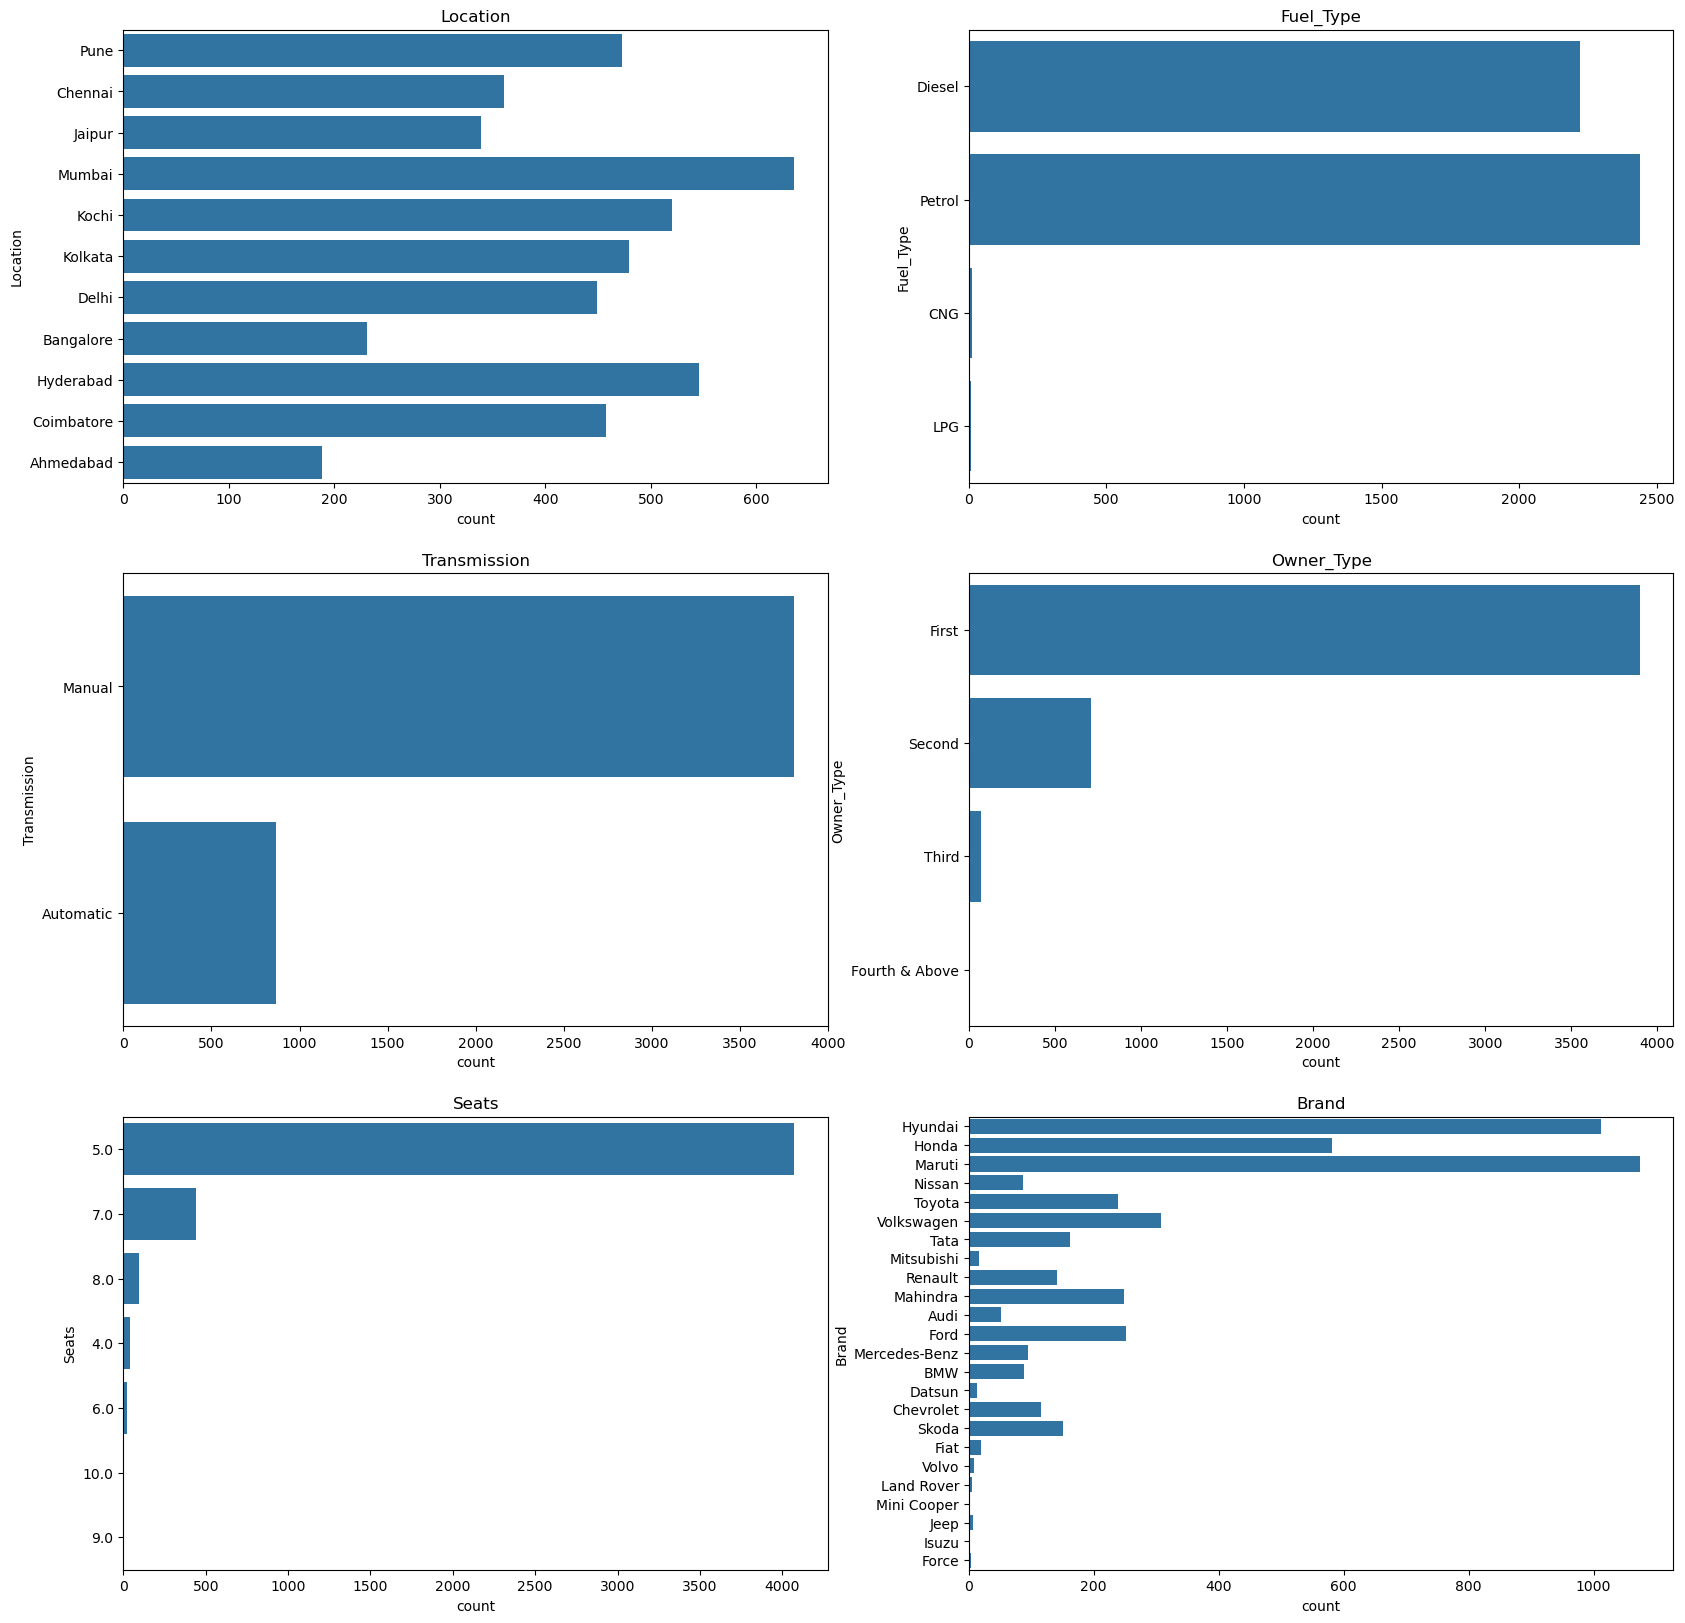

In [27]:
# Create count plot for all categorical columns in nX2 subplots where each subplot represents one column

plt.figure(figsize= (20,20))
for i in range(1,7):
    plt.subplot(3,2,i)
    plt.title(cat_col[i])
    sns.countplot(data=data[cat_col[i]])    
plt.show()


From the countplot of categorical columns, we can dervie following observations: 
- At ~13%, Mumbai has the highest number of cars available for purchases, followed by Hyderabad (12%) and then Kochi(10%). 
- Most of the cars available for purchases are Diesel(~53%) as diesel cars provide better performance. 
- ~71% of the avaialable cars have Manual transmission 
- ~82% of the cars are first owned followed by second hand owned cars (15%) 
- Majority cars available for purchase are 5-seater(84%) followed by 7-seater(11%) 
- Maruti ranks first among all the car brands available in used car market.

# Bivariate EDA

<Figure size 1600x2000 with 0 Axes>

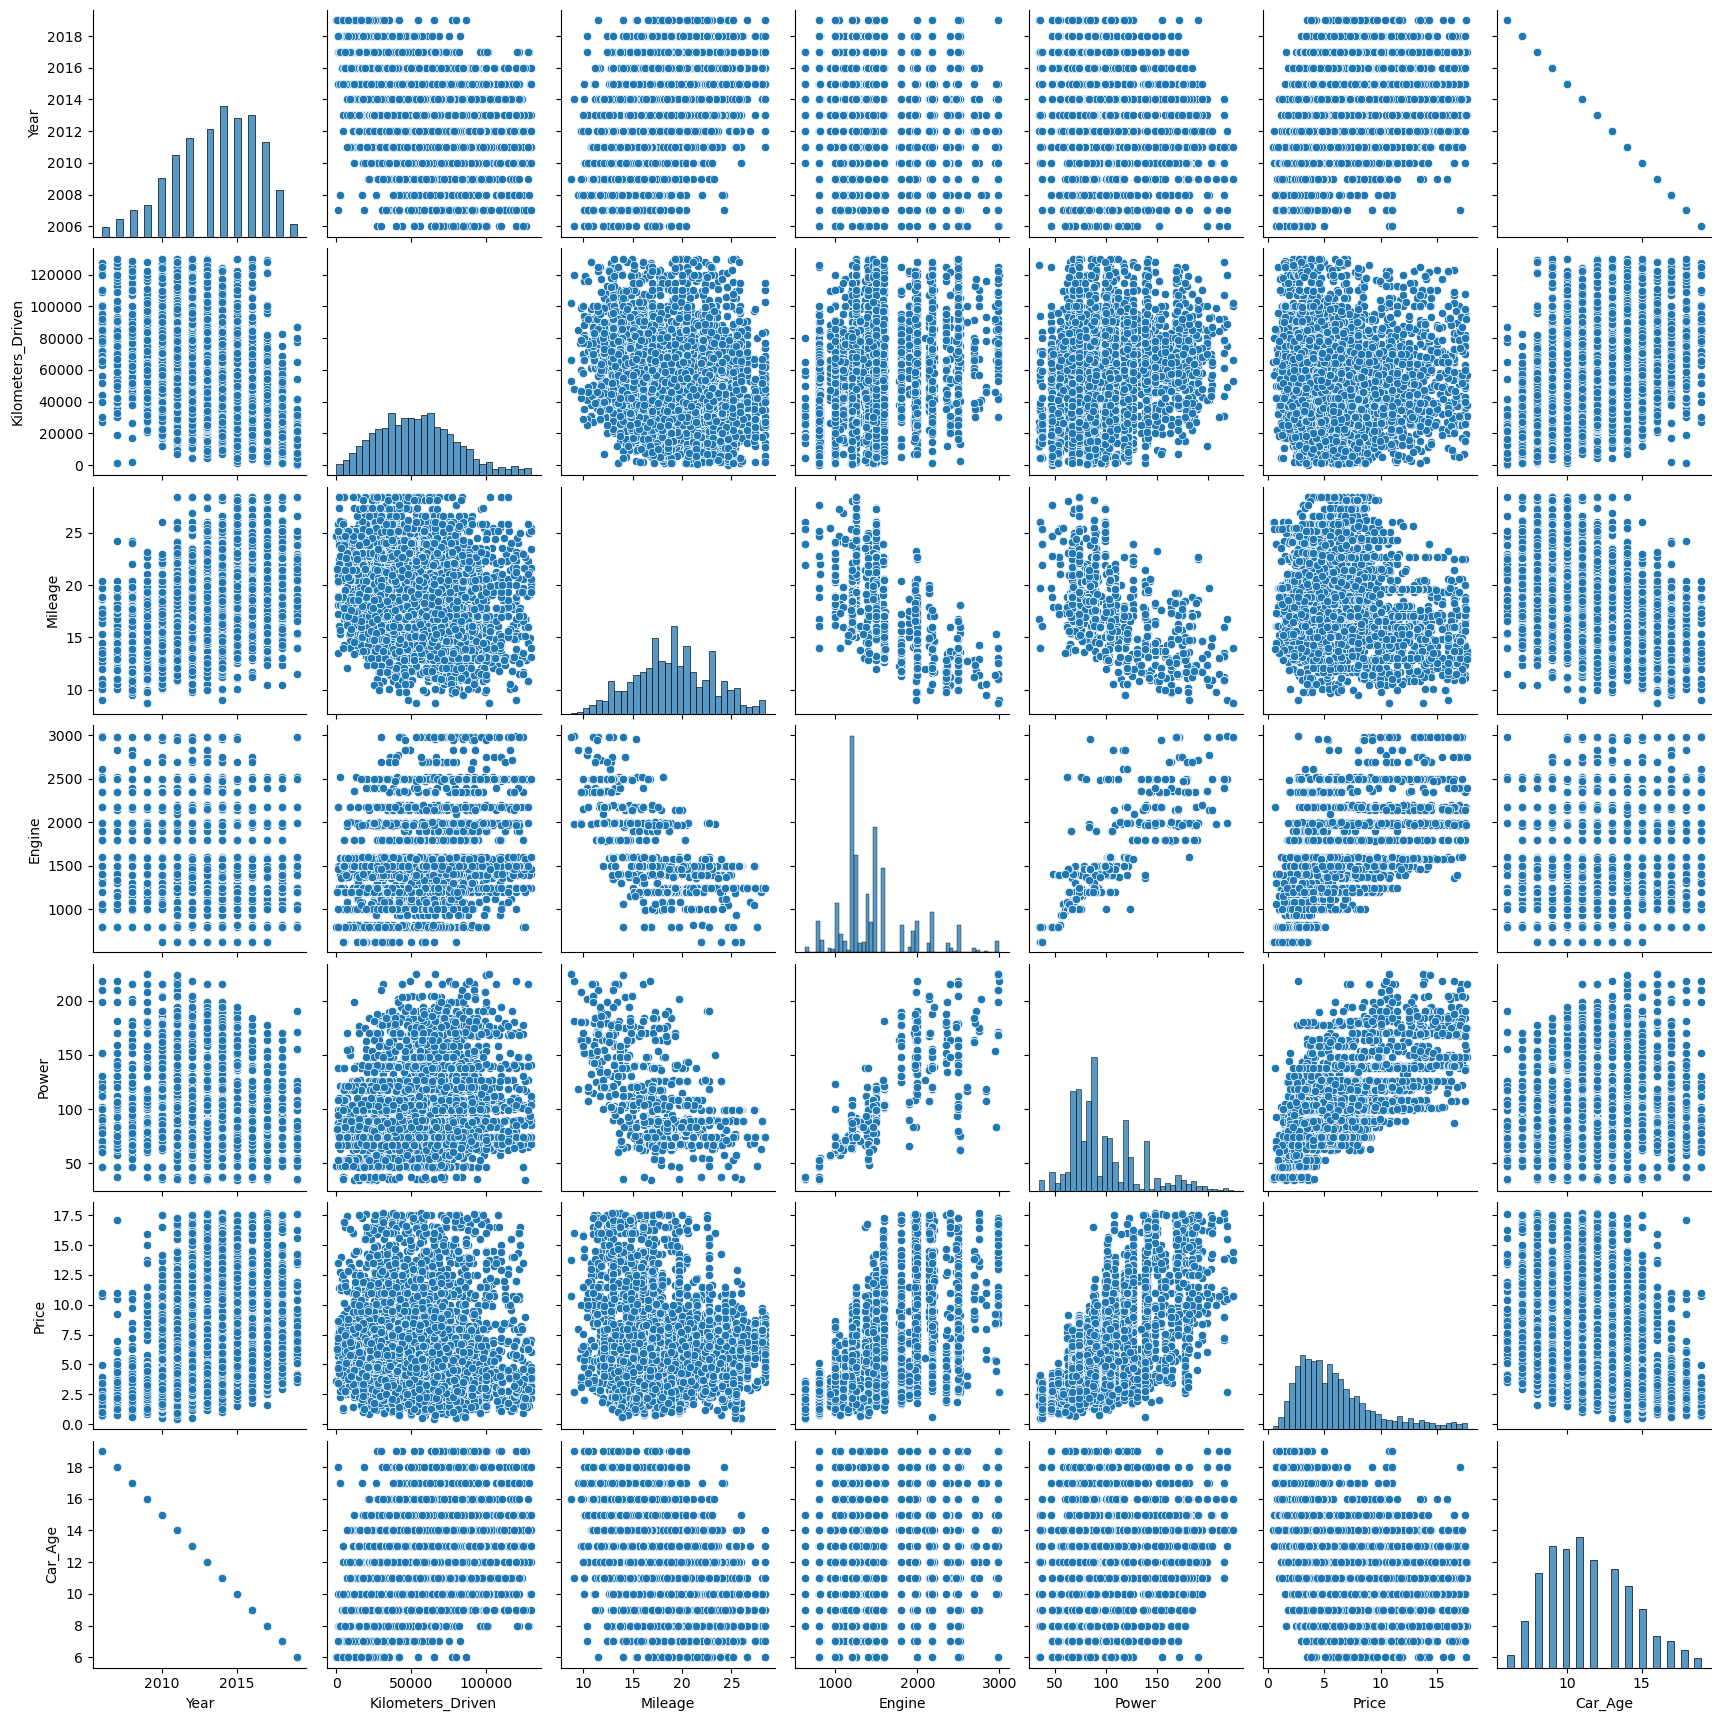

In [28]:
# pairplot
plt.figure(figsize=(16,20))
sns.pairplot(data)
plt.show()

In [29]:
data_num = data.select_dtypes(include=['number'])
corr_matrix = data_num.corr()
corr_matrix

,Year,Kilometers_Driven,Mileage,Engine,Power,Price,Car_Age
Year,1.000000,-0.500627,0.363978,-0.190707,-0.141661,0.371018,-1.000000
Kilometers_Driven,-0.500627,1.000000,-0.163661,0.328940,0.193798,-0.072376,0.500627
Mileage,0.363978,-0.163661,1.000000,-0.605298,-0.537926,-0.247471,-0.363978
Engine,-0.190707,0.328940,-0.605298,1.000000,0.811817,0.602610,0.190707
Power,-0.141661,0.193798,-0.537926,0.811817,1.000000,0.676701,0.141661
Price,0.371018,-0.072376,-0.247471,0.602610,0.676701,1.000000,-0.371018
Car_Age,-1.000000,0.500627,-0.363978,0.190707,0.141661,-0.371018,1.000000


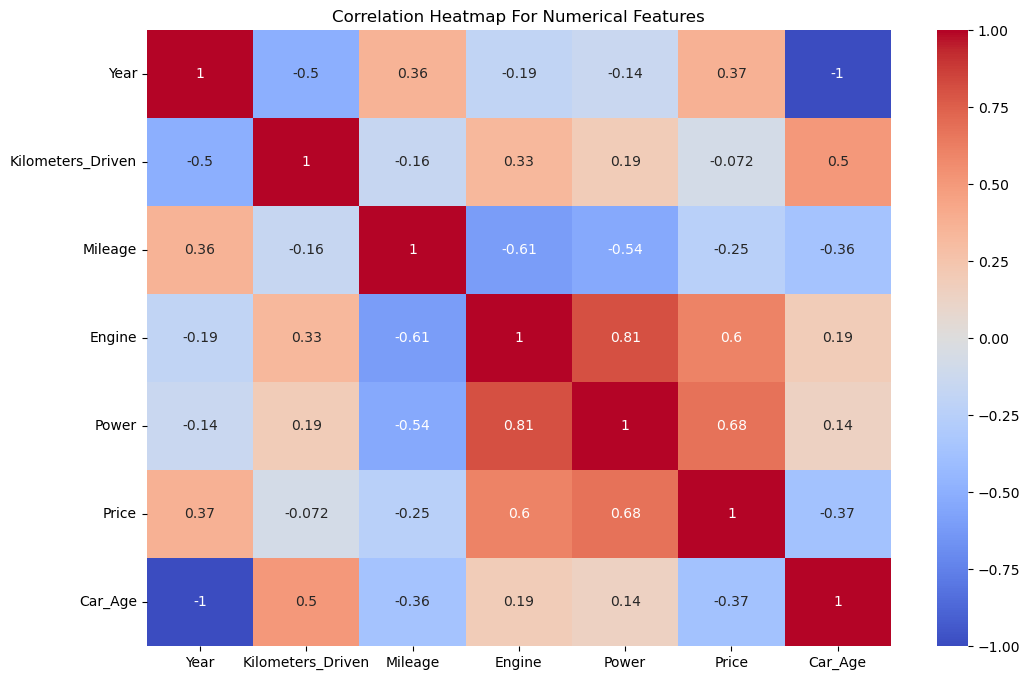

In [30]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt='.2g',cmap='coolwarm')
plt.title("Correlation Heatmap For Numerical Features")
plt.show()

In [31]:
# explanation of this correlation 
# violin chart for price column with all the categorical columns
# create a new column luxury_brand which takes value true if the brand is luxury brand it takes false


Year and Car_Age:
-1.000.
- A perfect negative correlation. The age of the car is the reverse of the year it was made. As the year increases, the car's age decreases.

Kilometers_Driven and Year:
-0.500.
- There is a moderate negative correlation between the year and kilometers driven. Older cars tend to have driven more kilometers, but the relationship is not perfect.

Kilometers_Driven and Car_Age:
0.500.
- A moderate positive correlation. As the car ages, the kilometers driven generally increases, which makes sense since older cars would typically have been driven more.

Mileage and Engine:
-0.605.
- There is a moderate negative correlation between mileage and engine size. Cars with larger engines tend to have worse fuel efficiency, as larger engines consume more fuel.

Mileage and Power:
-0.538.
- Similar to the engine size, higher engine power tends to be associated with lower mileage.

Price and Year:
0.371.
- There is a moderate positive correlation between the price of the car and its manufacturing year. Newer cars tend to be more expensive.

Price and Engine:
0.602.
- A moderate positive correlation. Cars with larger engines tend to have a higher price, possibly due to their increased power and overall performance.

Price and Power:
0.677.
- A strong positive correlation between price and engine power. More powerful engines tend to drive up the price of the car.

Price and Car_Age:
-0.371.
- There is a moderate negative correlation between price and car age. Older cars are generally cheaper.

In [ ]:
# box plot and density chart = violinplot

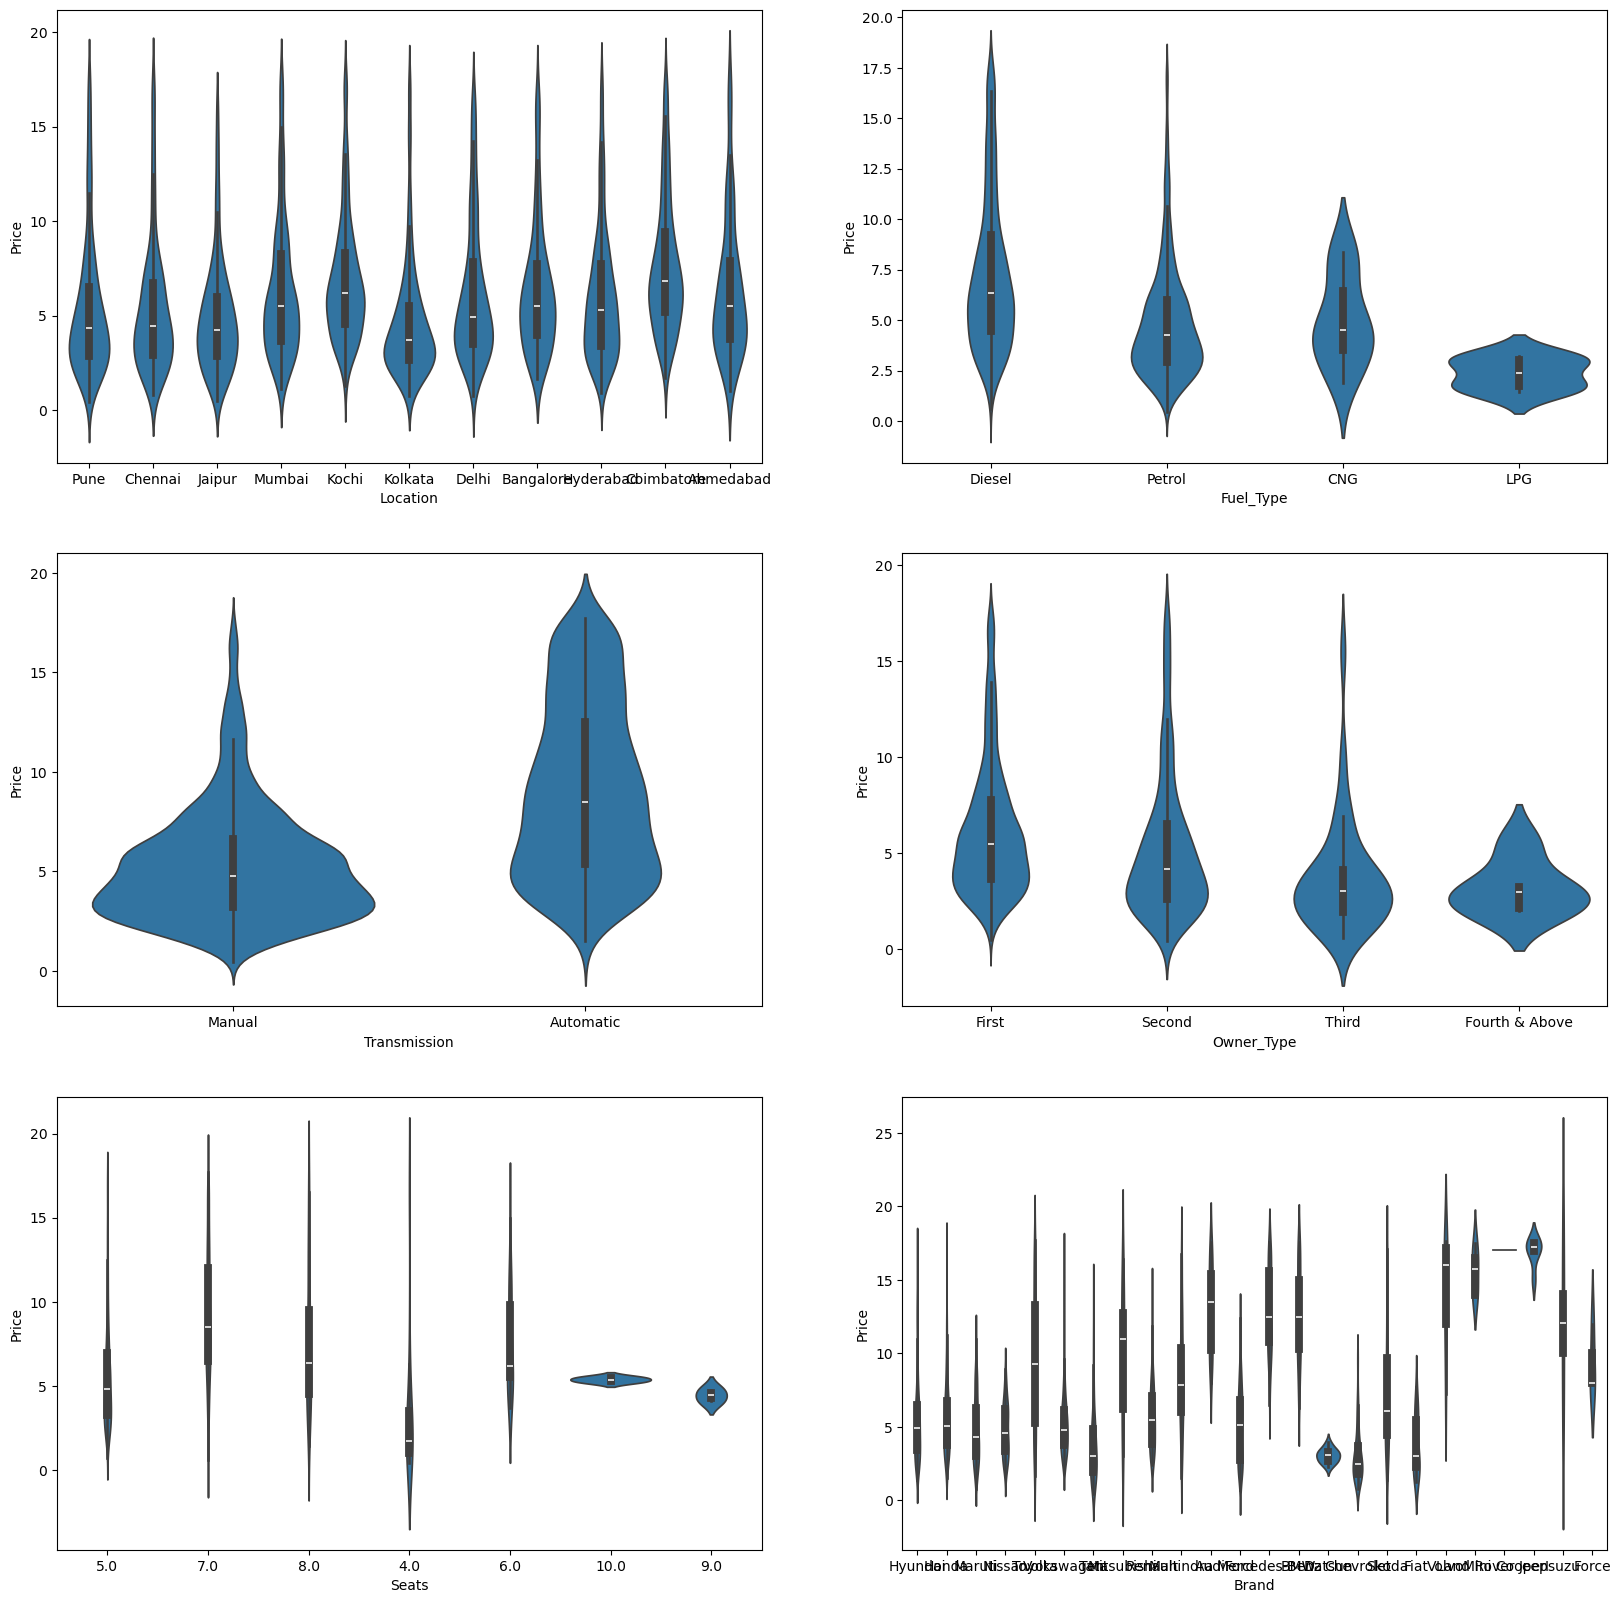

In [38]:
plt.figure(figsize=(20,20))
for i in range(1,7):
    plt.subplot(3,2,i)
    sns.violinplot(data,x=cat_col[i],y='Price')
plt.show()

In [33]:
luxury_cars=['Audi','BMW','Mercedes-Benz','Volvo','Land Rover','Mini Cooper']
luxury_cars

['Audi', 'BMW', 'Mercedes-Benz', 'Volvo', 'Land Rover', 'Mini Cooper']

In [34]:

data['Luxury_Car'] = data['Brand'].apply(lambda x: 'YES' if x in luxury_cars else 'NO')
data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Car_Age,Luxury_Car
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5.0,12.50,Hyundai,Creta 1.6,10,NO
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5.0,4.50,Honda,Jazz V,14,NO
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00,Maruti,Ertiga VDI,13,NO
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461,63.10,5.0,3.50,Nissan,Micra Diesel,12,NO
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36,2755,171.50,8.0,17.50,Toyota,Innova Crysta,9,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5970,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248,74.00,5.0,4.75,Maruti,Swift VDI,11,NO
5971,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120,71.00,5.0,4.00,Hyundai,Xcent 1.1,10,NO
5972,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498,112.00,8.0,2.90,Mahindra,Xylo D4,13,NO
5973,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998,67.10,5.0,2.65,Maruti,Wagon R,12,NO


In [35]:
data['Luxury_Car'].value_counts().get('YES', 0)

248